In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb

# Load the data

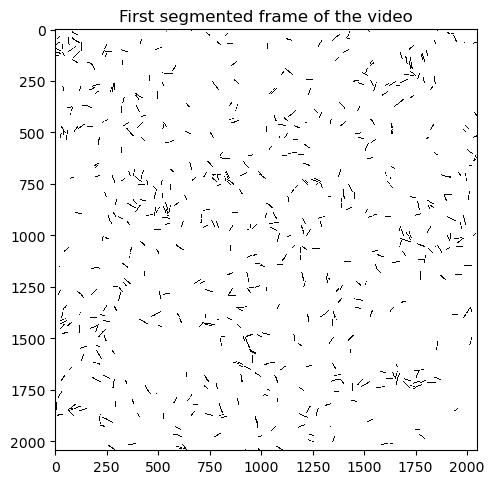

2044 2048


In [103]:
file_name="PilH_dilute_segmented.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|██████████████████████████████████████| 241/241 [00:02<00:00, 112.21it/s]


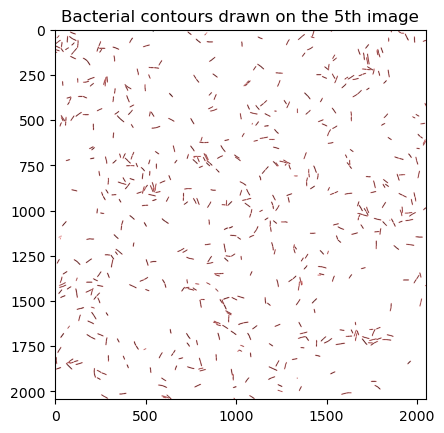

Fitting ellipses to the contours...: 100%|██████████████████████████████████████████| 241/241 [00:01<00:00, 171.99it/s]


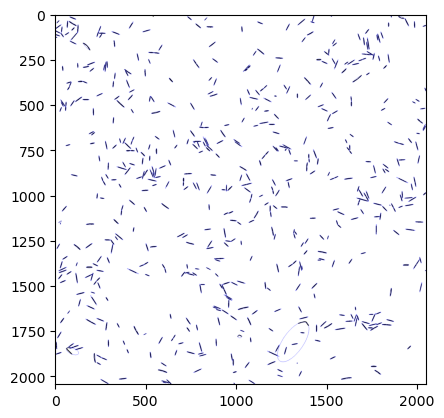

In [104]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=5, filter_max=(10,55))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,922.447632,2040.993896,0,6.335873,3.102256,125.772354
1,988.348450,2039.280273,0,15.296427,4.115221,139.704742
2,604.169983,2034.773193,0,20.112776,3.568538,101.115143
3,1088.163940,2033.127686,0,40.736771,4.462940,118.329773
4,608.044861,2030.621338,0,45.339333,4.577644,105.584564
...,...,...,...,...,...,...
132658,1734.592896,21.615288,240,31.771103,5.834028,179.647797
132659,118.732414,6.221175,240,21.182425,4.305619,120.974945
132660,1908.673828,5.702821,240,16.720350,3.921356,21.642391
132661,1377.943726,0.198957,240,12.498411,3.770381,85.605019


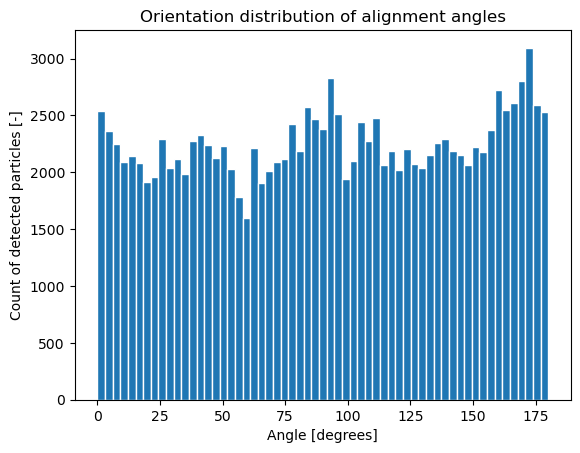

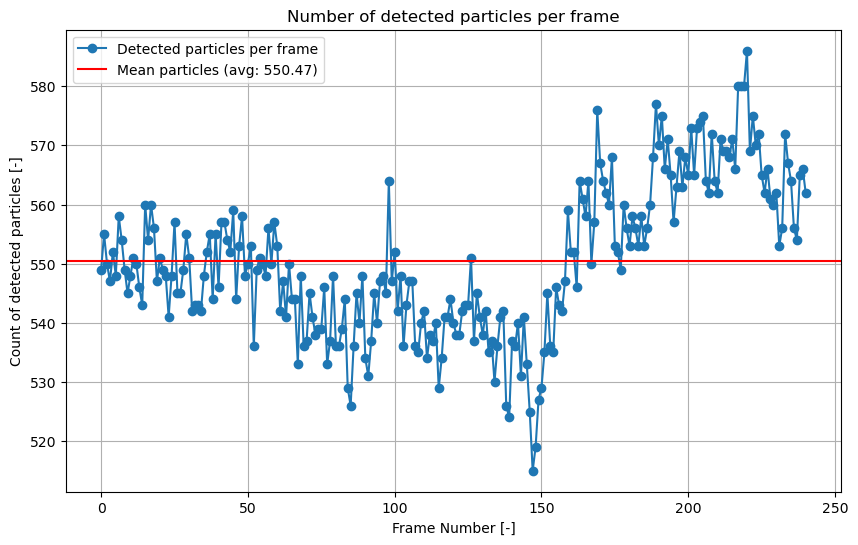

In [105]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')
plt.title("Orientation distribution of alignment angles")
plt.xlabel('Angle [degrees]')
plt.ylabel('Count of detected particles [-]')
plt.show()

# Count the number of particles per frame
particles_per_frame = ellipses_df.groupby('frame').size()

# Calculate the mean number of particles across all frames
mean_particles = particles_per_frame.mean()

# Plotting the number of detected particles per frame
plt.figure(figsize=(10,6))
plt.plot(particles_per_frame.index, particles_per_frame.values, marker='o', label='Detected particles per frame')  # Use plt.bar for a bar chart

# Plotting the mean number of particles as a horizontal line
plt.axhline(y=mean_particles, color='r', linestyle='-', label=f'Mean particles (avg: {mean_particles:.2f})')

# Adding titles and labels
plt.title('Number of detected particles per frame')
plt.xlabel('Frame Number [-]')
plt.ylabel('Count of detected particles [-]')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [106]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [107]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=30)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 240: 562 trajectories present.


,particle,count
0,235,241
1,239,241
2,267,241
3,265,241
4,263,241
...,...,...
847,5745,31
848,5754,31
849,293,31
850,22,31


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,658.330444,664.403687,0,44.949986,4.463994,163.776703,2
1,657.946594,663.844116,1,44.310726,4.373544,164.760803,2
2,657.810913,663.562866,2,43.523331,4.595137,165.294479,2
3,657.126282,661.939087,3,43.956234,4.356061,165.392853,2
4,656.563721,660.752075,4,43.976242,4.618662,167.563828,2
...,...,...,...,...,...,...,...
109874,674.478638,1873.776611,236,46.002026,4.879095,103.497620,5754
109875,675.108582,1873.903320,237,47.910114,4.958155,103.365883,5754
109876,676.400757,1873.857422,238,48.162163,4.838687,103.438766,5754
109877,676.182495,1873.526367,239,46.157360,4.826719,102.013512,5754


# Load the results of the tracking

In [108]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,658.330444,664.403687,0,44.949986,4.463994,163.776703,2
1,657.946594,663.844116,1,44.310726,4.373544,164.760803,2
2,657.810913,663.562866,2,43.523331,4.595137,165.294479,2
3,657.126282,661.939087,3,43.956234,4.356061,165.392853,2
4,656.563721,660.752075,4,43.976242,4.618662,167.563828,2
...,...,...,...,...,...,...,...
109874,674.478638,1873.776611,236,46.002026,4.879095,103.497620,5754
109875,675.108582,1873.903320,237,47.910114,4.958155,103.365883,5754
109876,676.400757,1873.857422,238,48.162163,4.838687,103.438766,5754
109877,676.182495,1873.526367,239,46.157360,4.826719,102.013512,5754


# Plot trajectories

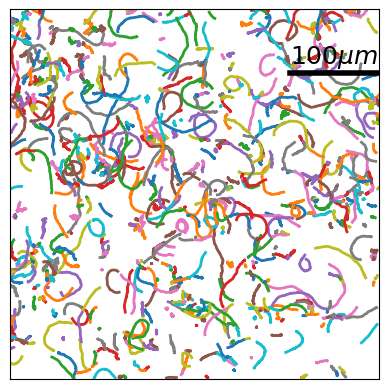

In [109]:
tb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1625)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [110]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=3)

particle_params.rename(columns={"x": "x [um]","y": "y [um]","major_axis_size": "major_axis_size [um]","minor_axis_size": "minor_axis_size [um]", "body_angle": "body_angle [degrees]", "vx":"vx [um/s]", "vy":"vy [um/s]", "vel":"vel [um/s]", "ax":"ax [um/s^2]", "ay":"ay [um/s^2]", "acc":"acc [um/s^2]", "diff_body_angle":"diff_body_angle [degrees]", "angular_vel": "angular_vel [degrees/s]", "angular_acc": "angular_acc [degrees/s^2]"}, inplace=True)

display(particle_params)


tb.write_kinematics(particle_params, file_name)

100%|███████████████████████████████████████████████████████████████████████████████| 852/852 [00:03<00:00, 228.53it/s]


,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,106.978697,107.965599,0,7.304373,0.725399,163.776703,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106.916322,107.874669,1,7.200493,0.710701,164.760803,2,-0.020792,-0.030310,0.036756,NaN,NaN,NaN,0.984100,NaN,NaN
2,106.894273,107.828966,2,7.072541,0.746710,165.294479,2,-0.007349,-0.015234,0.016914,0.004481,0.005025,0.006733,0.533676,-0.150141,NaN
3,106.783021,107.565102,3,7.142888,0.707860,165.392853,2,-0.037084,-0.087955,0.095453,-0.009912,-0.024240,0.026188,0.098373,-0.145101,0.001680
4,106.691605,107.372212,4,7.146139,0.750533,167.563828,2,-0.030472,-0.064296,0.071152,0.002204,0.007886,0.008188,2.170975,0.690867,0.278656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109874,109.602779,304.488699,236,7.475329,0.792853,103.497620,5754,0.000327,-0.032433,0.032434,-0.018103,-0.014355,0.023104,2.152489,0.749616,0.016473
109875,109.705145,304.509290,237,7.785394,0.805700,103.365883,5754,0.034122,0.006863,0.034805,0.011265,0.013099,0.017276,-0.131737,-0.761408,-0.503675
109876,109.915123,304.501831,238,7.826351,0.786287,103.438766,5754,0.069993,-0.002486,0.070037,0.011957,-0.003117,0.012356,0.072884,0.068207,0.276538
109877,109.879655,304.448035,239,7.500571,0.784342,102.013512,5754,-0.011823,-0.017932,0.021479,-0.027272,-0.005149,0.027754,-1.425255,-0.499379,-0.189195


# Data analysis

Indexation of Groups (particles) and their reversals:
       Particle  Reversals
Index                     
0             2         39
1             3         69
2             4         22
3             5          2
4             6          6
...         ...        ...
847        5737          9
848        5740         10
849        5742          2
850        5745         14
851        5754          7

[852 rows x 2 columns]

Total number of unique particles: 852

Average number of reversals: 28.191314553990612
Standard deviation of reversals: 26.49461324156023


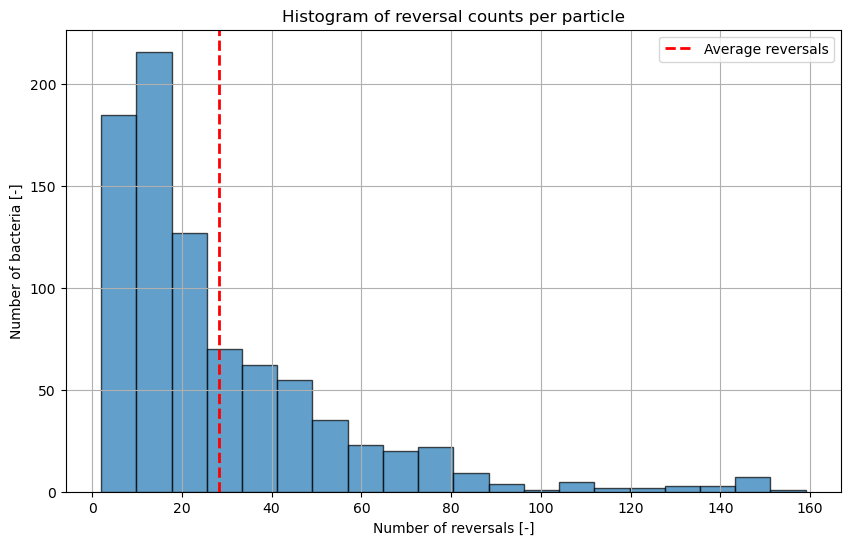

In [136]:
#To quantify reversal

df = particle_params

# Calculate the sign of velocities
df['vx_sign'] = df['vx [um/s]'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df['vy_sign'] = df['vy [um/s]'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

def count_reversals(group):
    group['vx_sign_change'] = group['vx_sign'].diff() != 0
    group['vy_sign_change'] = group['vy_sign'].diff() != 0
    group['reversal'] = (group['vx_sign_change'] & group['vy_sign_change']).astype(int)
    return group['reversal'].sum()

# Apply the function to each group and get the count of reversals per particle
reversals_per_particle = df.groupby('particle').apply(count_reversals)

reversals_df = reversals_per_particle.reset_index()
reversals_df.columns = ['Particle', 'Reversals']
reversals_df.index.name = 'Index'

average_reversals = reversals_df['Reversals'].mean()
std_dev_reversals = reversals_df['Reversals'].std()

print("Indexation of Groups (particles) and their reversals:")
print(reversals_df)
print(f"\nTotal number of unique particles: {len(reversals_df)}")
print(f"\nAverage number of reversals: {average_reversals}")
print(f"Standard deviation of reversals: {std_dev_reversals}")

plt.figure(figsize=(10, 6))
plt.hist(reversals_df['Reversals'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(average_reversals, color='red', linestyle='dashed', linewidth=2, label='Average reversals')
plt.title('Histogram of reversal counts per particle')
plt.xlabel('Number of reversals [-]')
plt.ylabel('Number of bacteria [-]')
plt.legend()
plt.grid(True)
plt.show()

Mean velocities for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
2         -0.003612  -0.013309    0.049641
3         -0.003690  -0.016477    0.041439
4         -0.024737  -0.009056    0.050541
5         -0.002917  -0.043788    0.124185
6          0.010641  -0.031209    0.082720
...             ...        ...         ...
5737       0.016048  -0.012014    0.053892
5740      -0.007942   0.004937    0.051944
5742      -0.012657   0.005838    0.055466
5745      -0.008671   0.000578    0.059877
5754       0.030047   0.012690    0.045108

[852 rows x 3 columns]
Standard deviations for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
2          0.035025   0.045986    0.032441
3          0.031317   0.039054    0.032678
4          0.049408   0.026289    0.035482
5          0.085161   0.089469    0.041288
6          0.068543   0.051321    0.039133
...             ...        ...         .

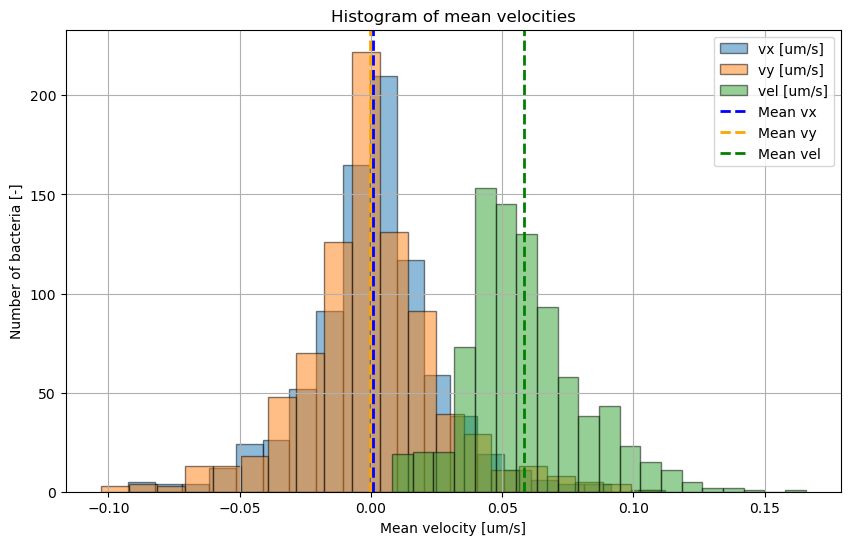

In [133]:
#To calculate mean velocties

mean_velocities_per_particle = df.groupby('particle')[['vx [um/s]', 'vy [um/s]', 'vel [um/s]']].mean()
std_dev_velocities_per_particle = df.groupby('particle')[['vx [um/s]', 'vy [um/s]', 'vel [um/s]']].std()

print(f"Mean velocities for each particle:\n {mean_velocities_per_particle}")
print(f"Standard deviations for each particle:\n {std_dev_velocities_per_particle}")

overall_mean_velocity = mean_velocities_per_particle.mean()
overall_std_dev_velocity = mean_velocities_per_particle.std()
print(f"Overall mean velocity for all particles:\n {overall_mean_velocity}")
print(f"Overall standard deviation for all particles:\n {overall_std_dev_velocity}")


plt.figure(figsize=(10, 6))
plt.hist(mean_velocities_per_particle['vx [um/s]'], bins=20, alpha=0.5, label='vx [um/s]', edgecolor='black')
plt.hist(mean_velocities_per_particle['vy [um/s]'], bins=20, alpha=0.5, label='vy [um/s]', edgecolor='black')
plt.hist(mean_velocities_per_particle['vel [um/s]'], bins=20, alpha=0.5, label='vel [um/s]', edgecolor='black')
plt.axvline(overall_mean_velocity['vx [um/s]'], color='blue', linestyle='dashed', linewidth=2, label='Mean vx')
plt.axvline(overall_mean_velocity['vy [um/s]'], color='orange', linestyle='dashed', linewidth=2, label='Mean vy')
plt.axvline(overall_mean_velocity['vel [um/s]'], color='green', linestyle='dashed', linewidth=2, label='Mean vel')
plt.title('Histogram of mean velocities')
plt.xlabel('Mean velocity [um/s]')
plt.ylabel('Number of bacteria [-]')
plt.legend()
plt.grid(True)
plt.show()


Total distance for each particle:
 particle
2       22.785352
3       29.836119
4       22.137100
5       89.413063
6       31.764456
          ...    
5737     5.011926
5740     4.830807
5742     5.158383
5745     5.388916
5754     4.059708
Name: distance, Length: 852, dtype: float64
Mean Trajectory Length: 21.79728594306578
Standard deviation of trajectory length: 15.940455090431344
Standard deviation of reversals: 26.49461324156023


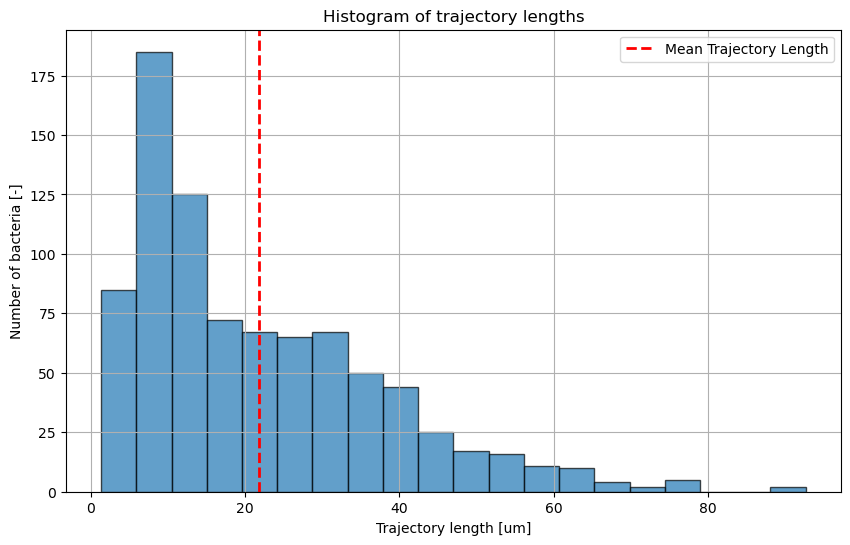

In [134]:
#To get mean legths of the trajectories

df = df.sort_values(by=['particle', 'frame'])

df['x_shifted'] = df.groupby('particle')['x [um]'].shift(1)
df['y_shifted'] = df.groupby('particle')['y [um]'].shift(1)
df['distance'] = np.sqrt((df['x [um]'] - df['x_shifted'])**2 + (df['y [um]'] - df['y_shifted'])**2)

total_distance_per_particle = df.groupby('particle')['distance'].sum()

mean_trajectory_length = total_distance_per_particle.mean()
std_trajectory_length = total_distance_per_particle.std()

print(f"Total distance for each particle:\n {total_distance_per_particle}")
print(f"Mean Trajectory Length: {mean_trajectory_length}")
print(f"Standard deviation of trajectory length: {std_trajectory_length}")

print(f"Standard deviation of reversals: {std_dev_reversals}")

plt.figure(figsize=(10, 6))
plt.hist(total_distance_per_particle, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(mean_trajectory_length, color='red', linestyle='dashed', linewidth=2, label='Mean Trajectory Length')
plt.title('Histogram of trajectory lengths')
plt.xlabel('Trajectory length [um]')
plt.ylabel('Number of bacteria [-]')
plt.legend()
plt.grid(True)
plt.show()
